<a href="https://colab.research.google.com/github/annchirackal/Basic-ML-Algorithm-From-Scratch/blob/main/Gradient_Descent_From_Scratch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture
!pip install jupyter-black

In [3]:
import jupyter_black

jupyter_black.load()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1: Load data set
Let's use some data set which is readly avaiable.

In [31]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the dataset
diabetes = load_diabetes()

# Convert to a DataFrame for easier exploration
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Display the first few rows
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


##2: Explore the dataset  and Scikit Learn Implementation
 Do a quick implementation using scipy to clearly understand  the relationship between independnt variables and target

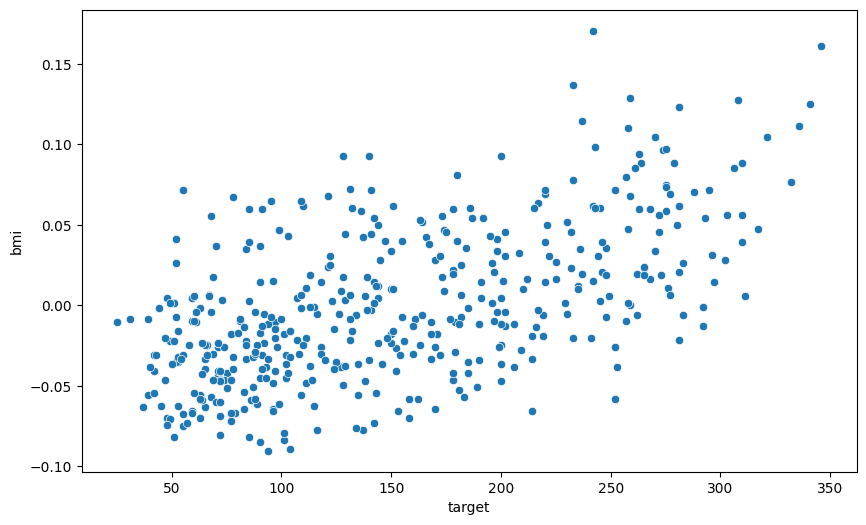

In [34]:
## Plot AveBedrms vs MedHouse
plt.figure(figsize=(10, 6))
sns.scatterplot(x='target', y='bmi', data=df)
plt.show()


In [39]:
## Scikit Learn Implementation
X=df.drop('target', axis=1)
y=df['target']
X.shape, y.shape

((442, 10), (442,))

In [40]:
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

model=lm.LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((353, 10), (353,), (89, 10), (89,))

In [41]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [42]:
mean_squared_error(y_test,y_pred),mean_absolute_percentage_error(y_test,y_pred)

(2900.193628493482, 0.3749982636756113)

## 3. Scratch Implemnetation Gradient decent

In [88]:
def gradient_descent(X, y, learning_rate=0.1, epochs=100):
  """A function to implement gradient decent with ols regression
     Prameters:
     X: np.arry : independent variable
     y: np.arry : dependent variable
     learning_rate: float : learning rate
     epochs: int : number of epochs
     Returns:
     y_pred: np.arry : predicted values
  """
  # y=beta.x+alpha
  m=X.shape[0]

  beta=1
  alpha=1
  for epoch in range(epochs):
    y_pred= beta*X+alpha
    loss= y_pred-y

    J = ((np.sum(loss ** 2) / (2 * m)))
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {J}")
    alpha=alpha-(learning_rate*np.mean(loss))
    beta=beta-(learning_rate*np.mean(loss*X))

  return y_pred


In [87]:
y_pred=gradient_descent(X=X_train['bmi'], y=y_train, learning_rate=0.1, epochs=20)

Epoch 1/20, Loss: 14699.935495895063
Epoch 2/20, Loss: 12483.170432128092
Epoch 3/20, Loss: 10687.498304231489
Epoch 4/20, Loss: 9232.911267270318
Epoch 5/20, Loss: 8054.603010309981
Epoch 6/20, Loss: 7100.080456694681
Epoch 7/20, Loss: 6326.8242428426765
Epoch 8/20, Loss: 5700.393707341889
Epoch 9/20, Loss: 5192.891933147182
Epoch 10/20, Loss: 4781.72243259438
Epoch 11/20, Loss: 4448.582062937306
Epoch 12/20, Loss: 4178.645288480094
Epoch 13/20, Loss: 3959.9034333476916
Epoch 14/20, Loss: 3782.629476589048
Epoch 15/20, Loss: 3638.944536501576
Epoch 16/20, Loss: 3522.466723169551
Epoch 17/20, Loss: 3428.0267092110607
Epoch 18/20, Loss: 3351.4373422376
Epoch 19/20, Loss: 3289.307031071563
Epoch 20/20, Loss: 3238.8885886838157


## Now implemnet an ols regression to which can accept multiple features for indpendent features with a stopping condition